Dr. Pati is concerned about the amount of food wasted at his hospital AB. 

AB hospital prepares food for all their patients which accounted for 4% of the operating cost. 

Dr. Pati found that as high as 50% of the food prepared was wasted on few days. 

Dr. Pati believed that an accurate forecasting model will help her reduce the food wastage. 

The demand for breakfast at AB hospital for past 37 days is provided. 

Analyse ACF and PACF graphs by taking lag = 12

Build an AR model based on the first 30 days data and forecast the demand for spares for months 31 to 37.

Analyse the accuracy of the forecast

In [57]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
%matplotlib inline

In [58]:
from statsmodels.tsa.ar_model import AR
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [59]:
import warnings
warnings.filterwarnings("ignore")

## correlation of lag=0 to 4

In [4]:
data = pd.read_csv('breakFastDemand.csv', header=0)

In [5]:
data.head(5)

,Day,DemandBF
0,1,25
1,2,25
2,3,25
3,4,35
4,5,41


In [6]:
data1 = concat([data, data.shift(1) , data.shift(2), data.shift(3), data.shift(4)], axis=1)

In [7]:
data1.head(5)

,Day,DemandBF,Day,DemandBF,Day,DemandBF,Day,DemandBF,Day,DemandBF
0,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,25,1.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,25,2.0,25.0,1.0,25.0,NaN,NaN,NaN,NaN
3,4,35,3.0,25.0,2.0,25.0,1.0,25.0,NaN,NaN
4,5,41,4.0,35.0,3.0,25.0,2.0,25.0,1.0,25.0


In [8]:
data1.columns = ['day', 'breakFast', 'day+1', 'breakFast+1', 'day+2', 'breakFast+2', 'day+3', 'breakFast+3', 'day+4', 'breakFast+4']

In [9]:
data1.head(5)

,day,breakFast,day+1,breakFast+1,day+2,breakFast+2,day+3,breakFast+3,day+4,breakFast+4
0,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,25,1.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,25,2.0,25.0,1.0,25.0,NaN,NaN,NaN,NaN
3,4,35,3.0,25.0,2.0,25.0,1.0,25.0,NaN,NaN
4,5,41,4.0,35.0,3.0,25.0,2.0,25.0,1.0,25.0


In [10]:
data1 = data1[['breakFast', 'breakFast+1', 'breakFast+2', 'breakFast+3', 'breakFast+4']]

In [11]:
result = data1.corr()
result

,breakFast,breakFast+1,breakFast+2,breakFast+3,breakFast+4
breakFast,1.000000,0.703027,0.526378,0.347135,0.268588
breakFast+1,0.703027,1.000000,0.702977,0.526378,0.350195
breakFast+2,0.526378,0.702977,1.000000,0.703088,0.528235
breakFast+3,0.347135,0.526378,0.703088,1.000000,0.707001
breakFast+4,0.268588,0.350195,0.528235,0.707001,1.000000


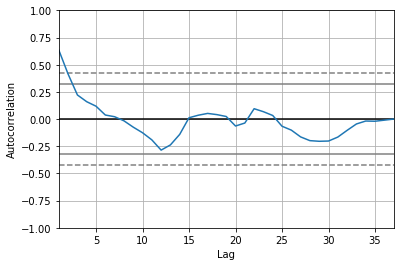

In [12]:
# autocorrelation plot of time series
autocorrelation_plot(data['DemandBF'])

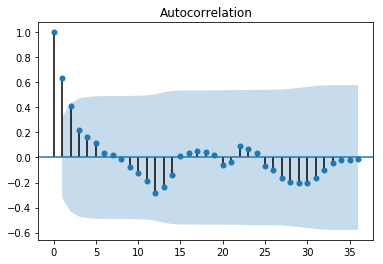

In [13]:
plot_acf(data['DemandBF'], lags=36)
pyplot.show()

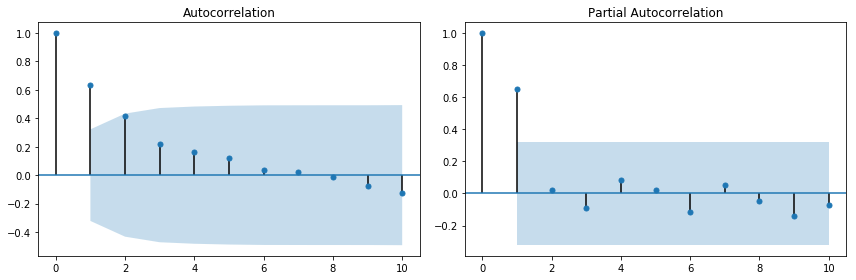

In [44]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(data['DemandBF'], lags=10, ax=axes[0])
smt.graphics.plot_pacf(data['DemandBF'], lags=10, ax=axes[1])
plt.tight_layout()

# autoregressive model

In [45]:
data.shape

(37, 2)

In [46]:
# split dataset
X = data['DemandBF']
train, test = X[1:len(X)-7], X[len(X)-7:]

In [49]:
# train autoregression model
model = AR(train)
model_fit = model.fit(maxlag=1)

In [50]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 1
Coefficients: const          19.398591
L1.DemandBF     0.531274
dtype: float64


In [51]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1 )

In [52]:
test.values[1]

45

In [53]:
predictions.values[1]

42.68816615391076

In [54]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions.values[i], test.values[i]))

predicted=43.837204, expected=45.000000
predicted=42.688166, expected=45.000000
predicted=42.077712, expected=46.000000
predicted=41.753394, expected=43.000000
predicted=41.581091, expected=40.000000
predicted=41.489552, expected=41.000000
predicted=41.440919, expected=41.000000


In [55]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.948


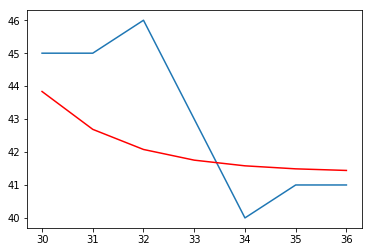

In [56]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()